In [1078]:
import bpy
import os
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from PIL import Image
import warnings
from helper_functies import *
from IPython.display import Image as JupImage
import imageio
import bmesh
import mathutils
from mathutils import Vector

tmpdir=tempfile.TemporaryDirectory()
size = [960, 1280]
my_dpi = 96 # Afhankelijk van monitor

# Import an obj ====================================================== #
def import_obj(import_name, export_name):

    # Import an original obj file
    file_loc = 'obj/' + import_name + '.obj'
    imported_object = bpy.ops.import_scene.obj(filepath = file_loc)
    obj_object = bpy.context.selected_objects[0]
    
    # Export the obj file
    blend_file_path = bpy.data.filepath
    directory = os.path.dirname(blend_file_path)
    target_file = os.path.join(directory, export_name + '.obj')
    bpy.ops.export_scene.obj(filepath='obj/' + export_name + '.obj')

    # Remove a mtl file and the original obj file
    os.remove('obj/' + export_name + '.mtl')
    bpy.ops.object.delete(use_global = False)

    # Re-Import the converted obj file
    file_loc = 'obj/'+ export_name + '.obj'
    imported_object = bpy.ops.import_scene.obj(filepath = file_loc)

    return bpy.context.selected_objects[0]
# ===================================================================== #


# Get an image ======================================================= #
def get_img(tmpdir=tmpdir, size=size):
    scene = bpy.context.scene
    
    # Set resolution of x and y
    scene.render.resolution_x = size[0]
    scene.render.resolution_y = size[1]
    scene.render.resolution_percentage = 100
    scene.render.filepath=tmpdir.name+"/image"
    
    # Render the image
    bpy.ops.render.render(write_still=True)
    
    # Save the rendered image
    save_loc = "C:/Users/cglab/Anaconda3/envs/blender/RenderingModule/result_448.png"
    bpy.data.images['Render Result'].save_render(filepath = save_loc)

    # Show the rendered image
    img=Image.open(tmpdir.name+"/image.png")
    return img
# ==================================================================== #


# Implement wireframe mode ============================================ #
def do_wireframe(object, mode=False):
    
    # do wireframe
    if mode:
        bpy.context.scene.render.use_freestyle = True
        bpy.context.scene.render.use_edge_enhance = True
        bpy.context.scene.render.edge_threshold = 255
        object.active_material.diffuse_color = (1, 1, 1)
        object.active_material.diffuse_intensity = 1
        
        # choose 'ABSOLUTE' or 'RELATIVE', I recommend 'ABSOLUTE'
        bpy.context.scene.render.line_thickness_mode = 'ABSOLUTE'
        bpy.context.scene.world.horizon_color = (1, 1, 1)
        
    # do not wireframe
    else:
        bpy.context.scene.render.use_freestyle = False
        bpy.context.scene.render.use_edge_enhance = False
# ===================================================================== #


# Implement normal mode ================================================ #
def do_normal(object, mode=False):
    if mode:
        object.active_material.use_shadeless = True
        
        # Please, change a place with mc23.jpg
        realpath = r"C:\Users\cglab\Anaconda3\envs\blender\RenderingModule\mc23.jpg"
        try:
            img = bpy.data.images.load(realpath)
        except:
            raise NameError("Cannot load image %s" % realpath)

        # Create image texture from image
        cTex = bpy.data.textures.new("NORMAL", type='IMAGE')
        cTex.image = img

        # Create material note that it is not same as the "texture"
        mat = bpy.data.materials.new("NORMAL")

        # Add texture slot for color texture
        mtex = mat.texture_slots.add()
        mtex.texture = cTex
        mtex.texture_coords = 'NORMAL'
        mtex.use_map_color_diffuse = True
        mtex.use_map_color_emission = True
        mtex.emission_color_factor = 1.0
        mtex.use_map_density = False
        mtex.mapping = 'FLAT'

        # assign material to object
        object.data.materials.append(mat)

        # or overwrite an existing material slot via index operator
        object.data.materials[0] = mat
# ===================================================================== #


# The position and mode of the camera ========================================== #
def camera_pos(r, theta, phi, obj, mode):
    camera_obj = bpy.data.objects['Camera']
    
    # Perspective or Orthographic
    camera_obj.data.type = mode
    
    # Camera tracks to an object
    ttc = camera_obj.constraints.new(type='TRACK_TO')
    ttc.target = obj
    ttc.track_axis = 'TRACK_NEGATIVE_Z'
    ttc.up_axis = 'UP_Y'    
    
    # Spherical coord. is converted to cartesian coord.
    x = r * sin(theta * (math.pi/180)) * cos(phi * (math.pi/180))
    y = r * sin(theta * (math.pi/180)) * sin(phi * (math.pi/180))
    z = r * cos(theta * (math.pi/180))
    
    camera_obj.location.x = x
    camera_obj.location.y = y
    camera_obj.location.z = z
# ====================================================================== #

In [1079]:
zero(my_dpi)
#Set the light, RECOMMENDED TYPE :  SUN or POINT 
bpy.ops.object.lamp_add(type='SUN',location=(5,2,1))

#Set the camera
camera = bpy.ops.object.camera_add()

#Load meshes .obj
import_name = 'chair braket(4ea)'
export_name = 'chair braket(4ea)_b'

obj_object = import_obj(import_name, export_name)
obj = bpy.data.objects[obj_object.name]

bpy.ops.transform.resize(value=(10, 10, 10))
#bpy.ops.transform.translate(value = (0, 0, 0))

camera_pos(1, 90, 45, obj, 'PERSP') # (radius, theta, phi, obj, 'PERSP' or 'ORTHO')

print('Imported name: ', obj_object.name)

#Set the environment lighting and the color of background
obj_object.active_material.use_cast_shadows = True
bpy.context.scene.world.light_settings.use_environment_light = True
bpy.context.scene.world.horizon_color = (0, 0, 0)    # the color of background

# Change color of an object
obj_object.active_material.diffuse_color = (1, 1, 1)
obj_object.active_material.diffuse_intensity = 1

# Implement Wireframe mode
do_wireframe(obj, False)

# Implement Normal mode
do_normal(obj, False)

(  0.0010 sec |   0.0010 sec) Importing OBJ 'obj/chair braket(4ea).obj'...
  (  0.0010 sec |   0.0000 sec) Parsing OBJ file...
    (  0.0080 sec |   0.0070 sec) Done, loading materials and images...
    (  0.0080 sec |   0.0070 sec) Done, building geometries (verts:378 faces:756 materials: 0 smoothgroups:0) ...
    (  0.0120 sec |   0.0110 sec) Done.
  (  0.0130 sec |   0.0120 sec) Finished importing: 'obj/chair braket(4ea).obj'
Progress: 100.00%

    (  0.0000 sec |   0.0000 sec) OBJ Export path: 'obj/chair braket(4ea)_b.obj'
          (  0.0190 sec |   0.0180 sec) Finished writing geometry of 'chair braket(4ea).013'.
          (  0.0210 sec |   0.0010 sec) Finished writing geometry of 'Camera.001'.
          (  0.0220 sec |   0.0010 sec) Finished writing geometry of 'Sun'.
          (  0.0230 sec |   0.0000 sec) Finished writing geometry of 'Camera'.
          (  0.0240 sec |   0.0000 sec) Finished writing geometry of 'Lamp'.
      (  0.0260 sec |   0.0260 sec) Finished exporting geo

<Figure size 800x800 with 0 Axes>

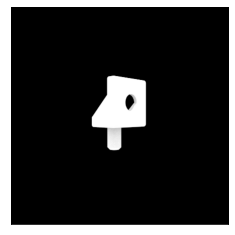

In [1080]:
# Save and show Image
plt.imshow(get_img(size=[448, 448]))
plt.xticks([]);plt.yticks([])
plt.show()

tmpdir.cleanup()